# **Assessment 1**

For our first assessment, our goal is to solve an imputation problem: we will create a neural network architecture that learns how to recover missing portions of an image.

This is an important problem in magnetic resonance imaging (MRI), where patient scans are often limited to a few areas to avoid lengthy scanning times.

In particular, we are going to focus on images of human heads. We have managed to gain access to one hundred images of patient's heads but, unfortunately, these images have a significant portion of missing information. Your goal during the assessment is to design a neural network that can recover these missing portions.

<br>

---

<br>

We do not have access to the labels for the images we want to recover, so we will have to be a bit creative to obtain a workable dataset on which to train our neural network.

Fortunately for us, we have access to a generative model that has been trained to produce realistic-looking MRI images of patient's heads. Using this model, you will create an appropriate dataset to train your architecture. We have provided you with the basic setup code to start using this generative model in **Question 1** below.

The corrupted images that we want to recover are contained in the numpy file `test_set.npy` of this repository. The file contains 100 patient images with a size of 64x64 pixels.

The architecture that you design in this assessment should use the artificially-generated dataset in order to recover the missing information in the images contained in `test_set.npy`.

<br>

All answers to the assessment should be contained within the structure below, but you are free to add new code and text cells as required to your answers. Read the text for each question and follow the instructions carefully. Answers that do not follow this structure will not be marked. **Do NOT change the name of this file.**

Please, **make sure to execute all your cells and save the result of the execution**. We will only mark cells that have been executed and will not execute any cells ourselves.

<br>

---

<br>

<br><br>

## **Question 1**  (25%)

Using the provided image-generation network, create a dataset of brain images that will later be used to train your chosen architecture.

Given that you will likely want to use this dataset multiple times during training, we recommend that you save the generated images to an appropriate folder in your GDrive.

Once you have generated your dataset, load and display ten of your generated images here.

We have also provided you with some corrupted images in the file `test_set.npy` of this repository. You should also load and display ten of these corrupted images here.

Below, we have provided template code, including some required downloads and installations, so that you can easily use the trained generative model. Sample generation in this model is done using the function `generate`, and is controlled by some input arguments. It is your job to figure out a sensible set of parameters that will produce images that are useful for the requirements of your task.

<br>

In [1]:
import os
import sys

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# INSTRUCTIONS:
# Open in a BROWSER https://drive.google.com/file/d/1I8Ry7Z_QqnlARwOuDgN4NPCd-GcLw1OC/view?usp=drive_link
# Download the file cw1_files.zip
# Go to https://drive.google.com/ and log in with the account you will be using for this coursework
# In the folder 'My Drive' upload cw1_files.zip (DO NOT UNZIP THE FILE)
# Run the following:

!unzip /content/drive/MyDrive/cw1_files.zip -d ./
!chmod +x run.sh
!bash ./run.sh
sys.path.append('/content/ese-invldm')

Mounted at /content/drive
Archive:  /content/drive/MyDrive/cw1_files.zip
  inflating: ./files/config_training.yml  
  inflating: ./run.sh                
  inflating: ./ese-invldm/setup.py   
  inflating: ./files/default_config.yml  
  inflating: ./ese-invldm/ese_invldm/ese_invldm.py  
  inflating: ./ese-invldm/ese_invldm/__init__.py  
  inflating: ./files/autoencoder/autoencoder_ckpt_latest.pth  
  inflating: ./files/diffusion/diffusion_ckpt_latest.pth  
Cloning the repository from https://github.com/dpelacani/InverseLDM.git...
Cloning into 'InverseLDM'...
remote: Enumerating objects: 1331, done.
remote: Counting objects: 100% (261/261), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 1331 (delta 167), reused 182 (delta 100), pack-reused 1070 (from 1)
Receiving objects: 100% (1331/1331), 467.16 KiB | 16.68 MiB/s, done.
Resolving deltas: 100% (875/875), done.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.2 M

In [3]:
from ese_invldm import generate

"""
Generates samples using a diffusion-based generative model.

This function leverages a pre-configured diffusion model to produce synthetic samples.
The sampling process supports adjustable parameters for total samples, inference steps, and batch size.
A scheduler and temperature can also be configured to control the sampling behaviour.

Parameters:
    num_samples (int):
        Total number of samples to generate.
    num_inference_steps (int):
        Number of diffusion inference steps.
        The minimum number of steps is 1, but we recommend exploring the range from 10 to 50.
        Please note that more steps will increase quality but also the computational cost. Be careful not
        to burn through your credits by using a very large number of steps!
    batch_size (int):
        Number of samples to process in each batch during sampling.
    scheduler (str, optional):
        Sampling scheduler to use (e.g., "ddim", "ddpm"). You can quickly test which one provides the most appropriate results
        for this task.
    temperature (float, optional):
        Sampling temperature to control randomness, given as a number between 0 and 1. Higher values produce more diverse outputs.
    seed (int, optional):
        Random seed for reproducibility. Defaults to 42.

Returns:
    list:
        A list containing the batches of generated samples, where each sample
        corresponds to a single data instance produced by the diffusion model.

"""

/usr/local/lib/python3.10/dist-packages/generative/networks/layers/vector_quantizer.py:86: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/usr/local/lib/python3.10/dist-packages/generative/networks/layers/vector_quantizer.py:124: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)


'\nGenerates samples using a diffusion-based generative model.\n\nThis function leverages a pre-configured diffusion model to produce synthetic samples.\nThe sampling process supports adjustable parameters for total samples, inference steps, and batch size.\nA scheduler and temperature can also be configured to control the sampling behaviour.\n\nParameters:\n    num_samples (int):\n        Total number of samples to generate.\n    num_inference_steps (int):\n        Number of diffusion inference steps.\n        The minimum number of steps is 1, but we recommend exploring the range from 10 to 50.\n        Please note that more steps will increase quality but also the computational cost. Be careful not\n        to burn through your credits by using a very large number of steps!\n    batch_size (int):\n        Number of samples to process in each batch during sampling.\n    scheduler (str, optional):\n        Sampling scheduler to use (e.g., "ddim", "ddpm"). You can quickly test which one

In [45]:
samples_1 = generate(500, 25, 10, "ddim", 1, 42)

/content/InverseLDM/invldm/runners/base_runner.py:137: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_states = torch.load(path)


Batch 0


100%|██████████| 25/25 [00:02<00:00,  8.91it/s]


Batch 1


100%|██████████| 25/25 [00:02<00:00,  9.03it/s]


Batch 2


100%|██████████| 25/25 [00:02<00:00,  9.02it/s]


Batch 3


100%|██████████| 25/25 [00:02<00:00,  9.08it/s]


Batch 4


100%|██████████| 25/25 [00:02<00:00,  9.08it/s]


Batch 5


100%|██████████| 25/25 [00:02<00:00,  9.04it/s]


Batch 6


100%|██████████| 25/25 [00:02<00:00,  9.03it/s]


Batch 7


100%|██████████| 25/25 [00:02<00:00,  9.02it/s]


Batch 8


100%|██████████| 25/25 [00:02<00:00,  8.98it/s]


Batch 9


100%|██████████| 25/25 [00:02<00:00,  9.04it/s]


Batch 10


100%|██████████| 25/25 [00:02<00:00,  9.03it/s]


Batch 11


100%|██████████| 25/25 [00:02<00:00,  9.03it/s]


Batch 12


100%|██████████| 25/25 [00:02<00:00,  8.97it/s]


Batch 13


100%|██████████| 25/25 [00:02<00:00,  8.91it/s]


Batch 14


100%|██████████| 25/25 [00:02<00:00,  8.97it/s]


Batch 15


100%|██████████| 25/25 [00:02<00:00,  9.04it/s]


Batch 16


100%|██████████| 25/25 [00:02<00:00,  9.02it/s]


Batch 17


100%|██████████| 25/25 [00:02<00:00,  9.01it/s]


Batch 18


100%|██████████| 25/25 [00:02<00:00,  8.92it/s]


Batch 19


100%|██████████| 25/25 [00:02<00:00,  8.90it/s]


Batch 20


100%|██████████| 25/25 [00:02<00:00,  9.00it/s]


Batch 21


100%|██████████| 25/25 [00:02<00:00,  8.96it/s]


Batch 22


100%|██████████| 25/25 [00:02<00:00,  8.96it/s]


Batch 23


100%|██████████| 25/25 [00:02<00:00,  8.90it/s]


Batch 24


100%|██████████| 25/25 [00:02<00:00,  8.89it/s]


Batch 25


100%|██████████| 25/25 [00:02<00:00,  8.92it/s]


Batch 26


100%|██████████| 25/25 [00:02<00:00,  8.95it/s]


Batch 27


100%|██████████| 25/25 [00:02<00:00,  8.95it/s]


Batch 28


100%|██████████| 25/25 [00:02<00:00,  8.91it/s]


Batch 29


100%|██████████| 25/25 [00:02<00:00,  8.83it/s]


Batch 30


100%|██████████| 25/25 [00:02<00:00,  8.84it/s]


Batch 31


100%|██████████| 25/25 [00:02<00:00,  8.89it/s]


Batch 32


100%|██████████| 25/25 [00:02<00:00,  8.86it/s]


Batch 33


100%|██████████| 25/25 [00:02<00:00,  8.82it/s]


Batch 34


100%|██████████| 25/25 [00:02<00:00,  8.78it/s]


Batch 35


100%|██████████| 25/25 [00:02<00:00,  8.75it/s]


Batch 36


100%|██████████| 25/25 [00:02<00:00,  8.76it/s]


Batch 37


100%|██████████| 25/25 [00:02<00:00,  8.79it/s]


Batch 38


100%|██████████| 25/25 [00:02<00:00,  8.75it/s]


Batch 39


100%|██████████| 25/25 [00:02<00:00,  8.77it/s]


Batch 40


100%|██████████| 25/25 [00:02<00:00,  8.68it/s]


Batch 41


100%|██████████| 25/25 [00:02<00:00,  8.66it/s]


Batch 42


100%|██████████| 25/25 [00:02<00:00,  8.63it/s]


Batch 43


100%|██████████| 25/25 [00:02<00:00,  8.65it/s]


Batch 44


100%|██████████| 25/25 [00:02<00:00,  8.69it/s]


Batch 45


100%|██████████| 25/25 [00:02<00:00,  8.72it/s]


Batch 46


100%|██████████| 25/25 [00:02<00:00,  8.72it/s]


Batch 47


100%|██████████| 25/25 [00:02<00:00,  8.71it/s]


Batch 48


100%|██████████| 25/25 [00:02<00:00,  8.78it/s]


Batch 49


100%|██████████| 25/25 [00:02<00:00,  8.75it/s]


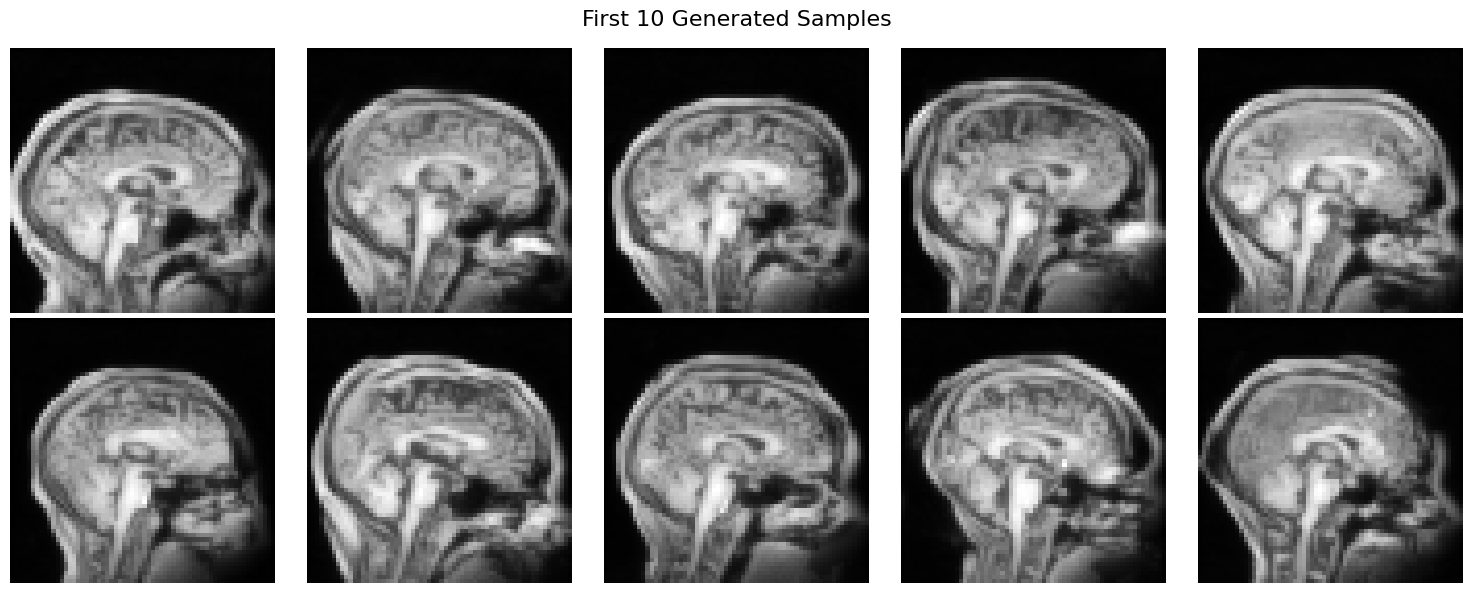

In [46]:
import matplotlib.pyplot as plt

# Assuming `samples_1` is the output from the generate function
# Example: samples_1 = generate(100, 10, 10, "ddim", 1, 42)

def visualize_samples(samples, num_images=10, rows=2, cols=5, cmap='gray'):
    """
    Visualizes the first `num_images` samples in a grid layout.

    Args:
        samples (list of tensors/arrays): List of generated samples (batches).
        num_images (int): Total number of images to display.
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
        cmap (str): Color map for the images ('gray' for grayscale).
    """
    # Flatten the list of batches into a single list of images
    all_images = [img.squeeze(0).cpu().numpy() for batch in samples for img in batch]

    # Take the first `num_images` images
    selected_images = all_images[:num_images]

    # Create the plot
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
    fig.suptitle("First 10 Generated Samples", fontsize=16)

    for i, ax in enumerate(axes.flat):
        if i < len(selected_images):
            ax.imshow(selected_images[i], cmap=cmap)
            ax.axis('off')
        else:
            ax.axis('off')  # Hide extra axes

    plt.tight_layout()
    plt.show()

# Call the function to visualize
visualize_samples(samples_1, num_images=10, rows=2, cols=5)


In [47]:
import numpy as np

test_imgs = np.load('/content/drive/MyDrive/test_set.npy')

# Print the shape or details of the loaded images
print(test_imgs.shape)



(100, 1, 64, 64)


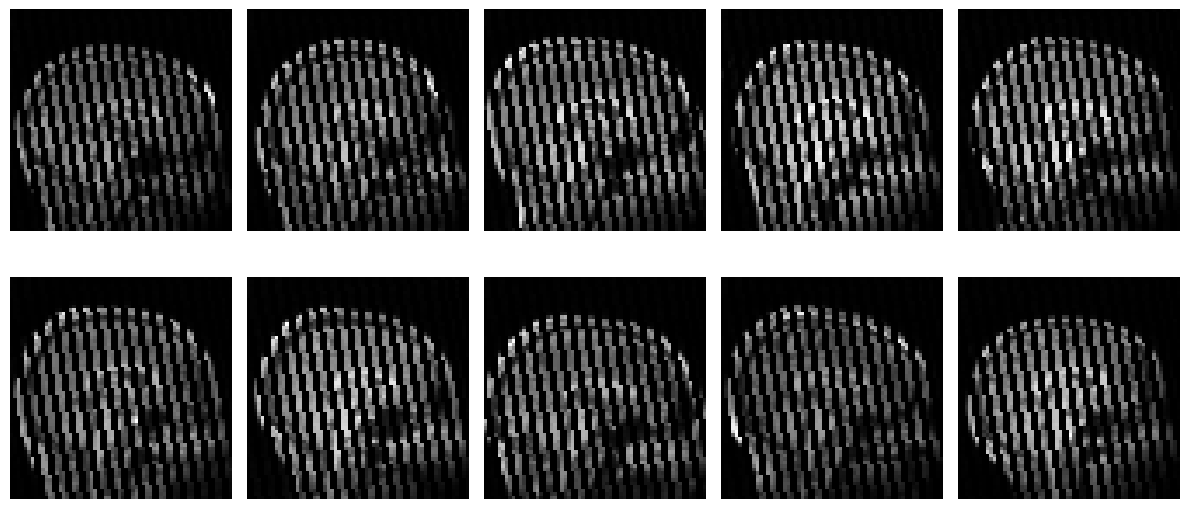

In [48]:
import matplotlib.pyplot as plt

# Extract the first 10 images and squeeze to remove the single channel dimension
first_10_images = test_imgs[:10].squeeze()

fig, axes = plt.subplots(2, 5, figsize=(12, 6))

# Iterate over the axes and display each image
for i, ax in enumerate(axes.flat):
    if i < len(first_10_images):
        ax.imshow(first_10_images[i], cmap='gray')  # Display in grayscale
        ax.axis('off')  # Hide the axis

plt.tight_layout()
plt.show()


<br>

---

<br>

## **Question 2**  (25%)

Using the data generated in **Question 1**, create a PyTorch `TensorDataset` and a `DataLoader` for the training set.

Using the provided corrupted images inside `test_set.npy`, create another `TensorDataset` and a `DataLoader` for the test set.

The training dataset should provide batches of brain images generated in **Question 1** and should corrupt these images appropriately so that they resemble images in the test set. The dataset should also pair each image with its corresponding un-corrupted image as a label.

The test dataset should provide the corrupted images provided, for which no labels are available.

Display here ten images of your training dataset and ten images of your test dataset, and their corresponding labels when available.

<br>



In [65]:
import torch
from torch.utils.data import DataLoader, TensorDataset
test_tensor = torch.tensor(test_imgs)
test_dataset = TensorDataset(test_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=10, shuffle=False)

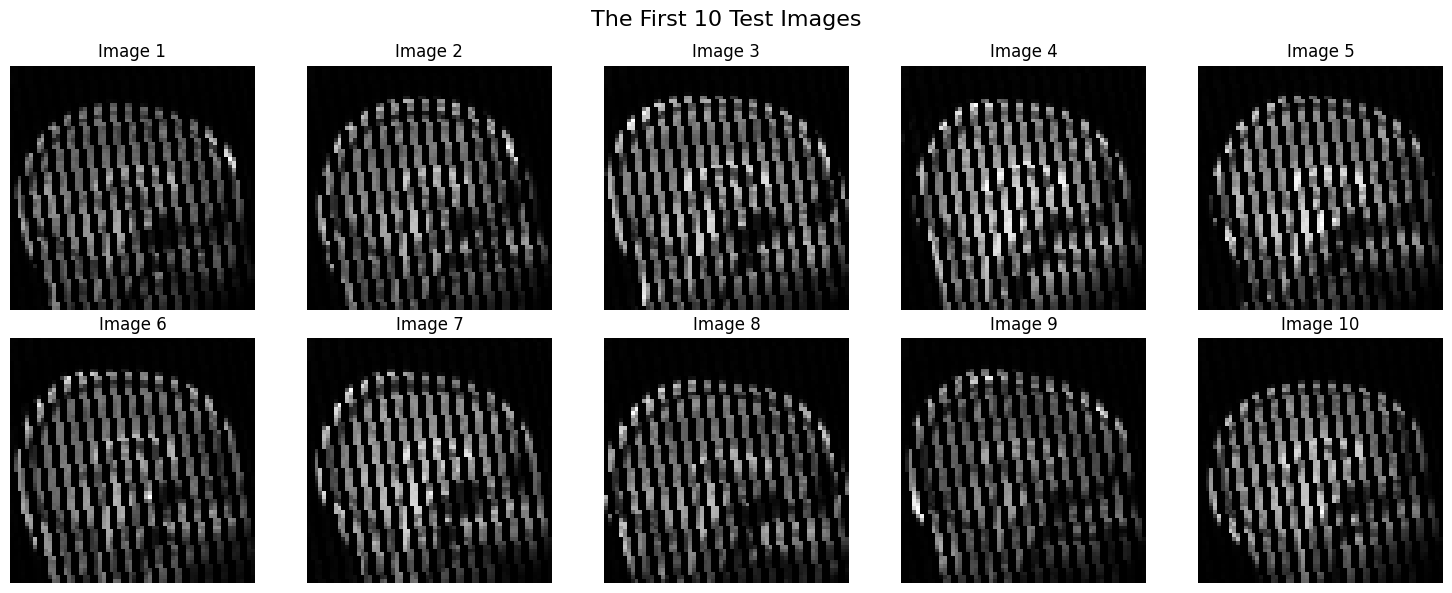

In [70]:
import matplotlib.pyplot as plt
import torch

for i, (inputs,) in enumerate(test_dataloader):
    # Only get the first batch of 10 images
    if i == 0:
        images = inputs
        break

# Plot the first 10 images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("The First 10 Test Images", fontsize=16)

for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(images[i].squeeze(0).cpu().numpy(), cmap="gray")
    ax.set_title(f"Image {i + 1}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [63]:
import copy
import numpy as np

samples_corrupted = copy.deepcopy(samples_1)
for batch_idx, batch in enumerate(samples_corrupted):
    # Iterate through each image in the batch
    for img_idx in range(batch.size(0)):  # Assuming batch is of shape (batch_size, channels, height, width)
        img = batch[img_idx]  # Extract the individual image tensor

        # Get the pixel coordinates
        x, y = np.meshgrid(np.arange(img.shape[2]), np.arange(img.shape[1]))  # Use width and height

        # Apply the condition for diagonal lines with slope -4.5
        condition = ((y - 4.5 * x) % 20 < 10)  # Adjust period (e.g., 20 pixels) for strip width

        img[0, condition] = 0
        # Replace the modified image back into the batch
        batch[img_idx] = img

# Visualize the first 10 modified images
# visualize_samples(samples_corrupted, num_images=10, rows=2, cols=5)




In [71]:
# Move tensors to CPU first
samples_corrupted_cpu = [sample.cpu() for sample in samples_corrupted]
samples_1_cpu = [sample.cpu() for sample in samples_1]

# Convert to numpy arrays
samples_corrupted_np = [sample.numpy() for sample in samples_corrupted_cpu]
samples_1_np = [sample.numpy() for sample in samples_1_cpu]

# Convert back to tensors
tensor_corrupted = torch.tensor(np.array(samples_corrupted_np))
tensor_1 = torch.tensor(np.array(samples_1_np))

# Load the data
training_dataset = TensorDataset(tensor_corrupted, tensor_1)
training_dataloader = DataLoader(training_dataset, batch_size=10, shuffle=True)

Original Inputs shape: torch.Size([10, 10, 1, 64, 64])
Original Labels shape: torch.Size([10, 10, 1, 64, 64])
Flattened and Squeezed Inputs shape: torch.Size([100, 64, 64])
Flattened and Squeezed Labels shape: torch.Size([100, 64, 64])


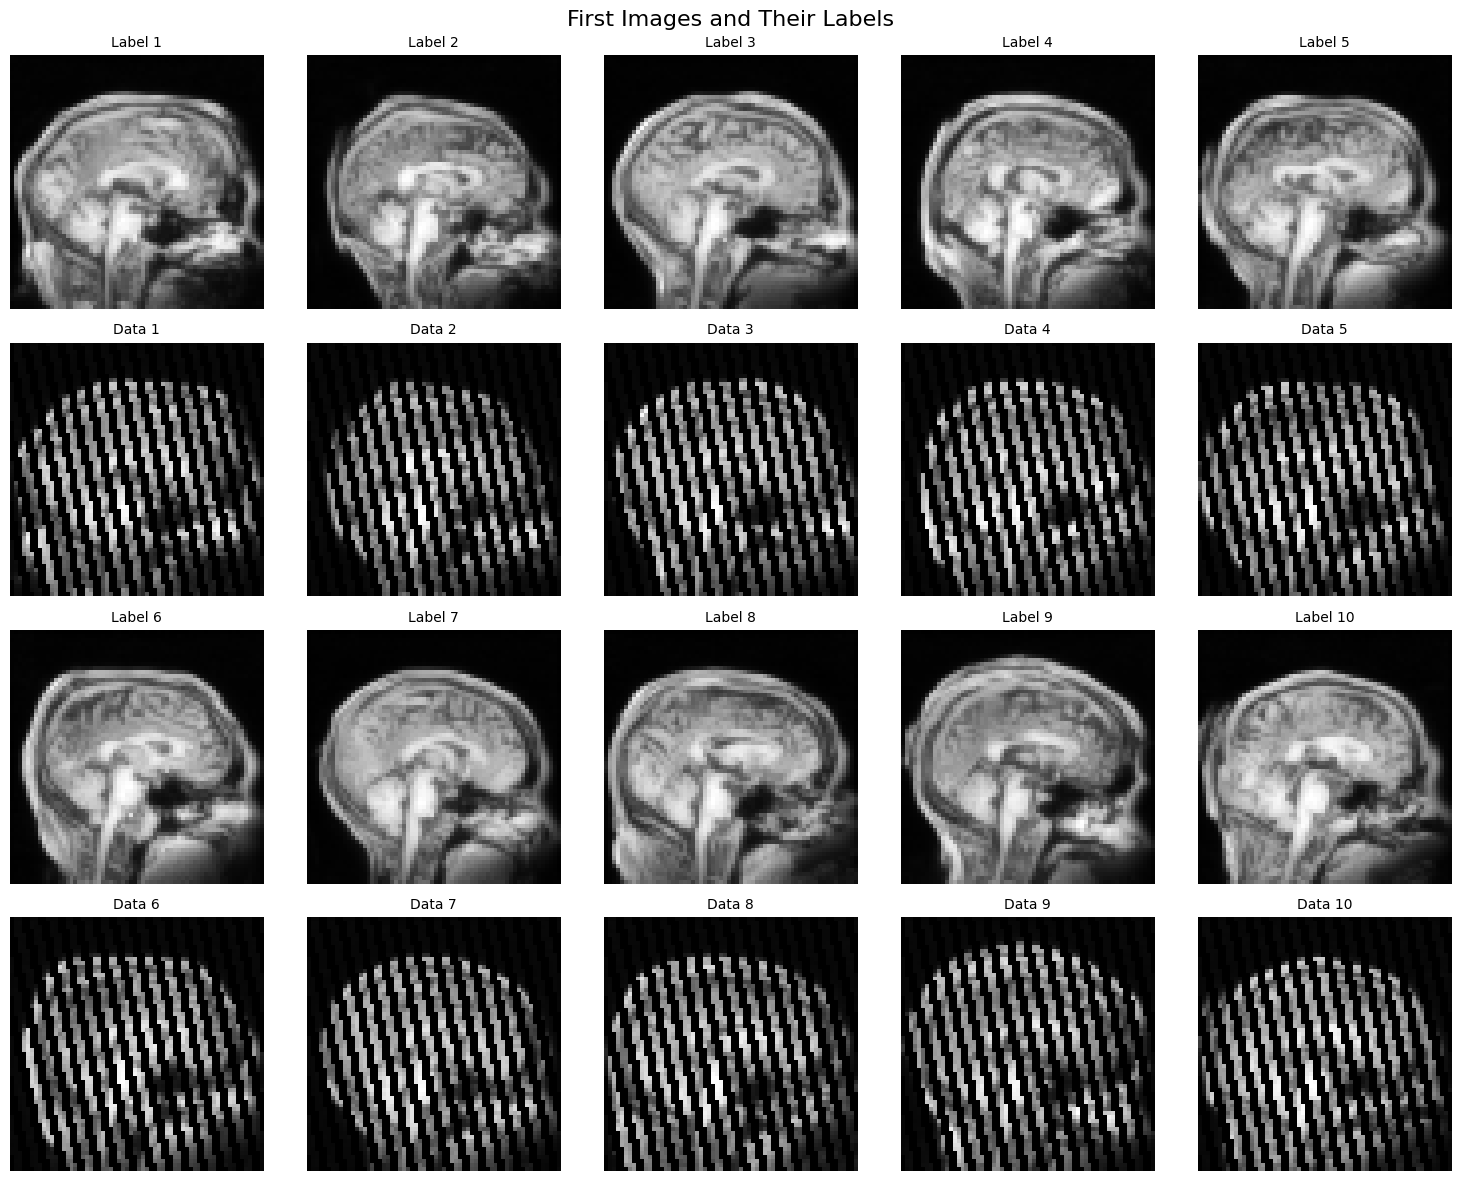

In [72]:
def visualize_dataset_samples(dataloader, num_images=10, rows=2, cols=5, cmap='gray'):
    for inputs, labels in dataloader:
        # Debug: Check the original shape
        print(f"Original Inputs shape: {inputs.shape}")
        print(f"Original Labels shape: {labels.shape}")

        # Flatten the extra dimensions: Combine batch and set dimensions
        batch_size, num_sets, channels, height, width = inputs.shape
        inputs = inputs.view(batch_size * num_sets, channels, height, width)
        labels = labels.view(batch_size * num_sets, channels, height, width)

        # Remove the channel dimension
        inputs = inputs.squeeze(1)  # Shape: [batch_size * num_sets, height, width]
        labels = labels.squeeze(1)  # Shape: [batch_size * num_sets, height, width]

        # Debug: Check the shape after processing
        print(f"Flattened and Squeezed Inputs shape: {inputs.shape}")
        print(f"Flattened and Squeezed Labels shape: {labels.shape}")

        # Take the first `num_images` images
        inputs = inputs[:num_images]
        labels = labels[:num_images]
        break  # Only process the first batch

    # Create a grid for visualization (2 rows per sample: one for label, one for input)
    fig, axes = plt.subplots(rows * 2, cols, figsize=(15, rows * 6))
    fig.suptitle("First Images and Their Labels", fontsize=16)

    for i in range(num_images):
        # Row and column indices
        row_label = (i // cols) * 2
        row_input = row_label + 1
        col = i % cols

        # Display label image
        label_img = labels[i].cpu().numpy()
        axes[row_label, col].imshow(label_img, cmap=cmap)
        axes[row_label, col].set_title(f"Label {i + 1}", fontsize=10)
        axes[row_label, col].axis('off')

        # Display data image
        data_img = inputs[i].cpu().numpy()
        axes[row_input, col].imshow(data_img, cmap=cmap)
        axes[row_input, col].set_title(f"Data {i + 1}", fontsize=10)
        axes[row_input, col].axis('off')

    plt.tight_layout()
    plt.show()


# Visualize the first batch of images and labels
visualize_dataset_samples(training_dataloader, num_images=10, rows=2, cols=5)


In [53]:
np.save('/content/drive/MyDrive/samples_corrupted.npy', samples_corrupted_cpu)  # Saving the corrupted images
np.save('/content/drive/MyDrive/samples_labels.npy', samples_1_cpu)  # Saving the labels (or original images)

<br>

---

<br>

## **Question 3** (50%)

Using the dataset created in **Question 2**, design and train an architecture to recover the missing image lines of the provided test dataset.

Once you have trained your architecture, display here ten images of the test set with the recovered lines filled in.

Additionally, save the test data with the missing values filled in into a numpy file called `test_set_nogaps.npy`. These images should be **in the same order** as those in the `test_set.npy` file and should have the same pixel size of 64x64. **Any images not contained in the `test_set_nogaps.npy` file or incorrectly ordered will not be marked.**

You have freedom to choose an architecture that you consider appropriate to solve this problem. However, you will need to train your chosen architecture as part of the assessment: **pre-trained networks are not allowed**.

You will be assessed by the quality of your predictions of the missing data values and additional marks will be given for originality in your network design choices. You should include, as part of your answer, a paragraph explaining the architecture you have chosen and any additional design choices and hyperparameters that have been important to build your solution.

This is an open-book assessment and you are encouraged to use resources online, including  tools like chatGPT. However, make sure to always mention the sources for your code and ideas, including websites, papers, and tools like chatGPT.

<br>


In [54]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data.dataset import random_split
import torchvision
from torchvision import transforms

In [55]:
class ConvBlock(nn.Module):
    """time-conditioned convolutional block"""

    def __init__(self, in_c, out_c):
        super().__init__()
        self.conv = nn.Conv2d(in_c, out_c, kernel_size=3, padding=1)
        # self.dense = nn.Linear(out_c)
        self.bn = nn.BatchNorm2d(out_c)
        self.act = nn.SiLU()

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.act(x)
        return x

class EncBlock(nn.Module):
    """time-conditioned U-Net encoder block"""

    def __init__(self, in_c, out_c, ):
        super().__init__()
        self.conv_block1 = ConvBlock(in_c, out_c)
        self.conv_block2 = ConvBlock(out_c, out_c)
        self.pool = nn.MaxPool2d((2, 2))

    def forward(self, x):
        h = self.conv_block1(x)
        h = self.conv_block2(h)
        p = self.pool(h)
        return h, p

class DecBlock(nn.Module):
    """time-conditioned U-Net decoder block"""

    def __init__(self, in_c, out_c):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_c, out_c, kernel_size=2, stride=2, padding=0)
        self.conv_block1 = ConvBlock(out_c+out_c, out_c)
        self.conv_block2 = ConvBlock(out_c, out_c)

    def forward(self, x, s):
        h = self.up(x)
        h = torch.cat([h, s], axis=1) # concatenate x with U-Net skip connection from encoder
        h = self.conv_block1(h)
        h = self.conv_block2(h)
        return h

In [56]:
class Unet(nn.Module):
    """DDPM U-Net, https://arxiv.org/abs/2006.11239 and https://arxiv.org/abs/1505.04597"""

    def __init__(self, n_channels):
        super().__init__()

        # encoder
        self.e1 = EncBlock(n_channels, 64)
        self.e2 = EncBlock(64, 128)
        self.e3 = EncBlock(128, 256)
        self.e4 = EncBlock(256, 512)

        # bottleneck
        self.b1 = ConvBlock(512, 1024)
        self.b2 = ConvBlock(1024, 1024)

        # decoder
        self.d1 = DecBlock(1024, 512)
        self.d2 = DecBlock(512, 256)
        self.d3 = DecBlock(256, 128)
        self.d4 = DecBlock(128, 64)

        # output layer
        self.output = nn.Conv2d(64, n_channels, kernel_size=1, padding=0)

    def forward(self, x):

        # encoder
        s1, x = self.e1(x)
        s2, x = self.e2(x)
        s3, x = self.e3(x)
        s4, x = self.e4(x)

        # bottleneck
        x = self.b1(x)
        x = self.b2(x)

        # decoder
        x = self.d1(x, s4)
        x = self.d2(x, s3)
        x = self.d3(x, s2)
        x = self.d4(x, s1)

        # output
        output = self.output(x)

        return output

In [57]:
def set_seed(seed):
    """
    Use this to set ALL the random seeds to a fixed value and take out any randomness from cuda kernels
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.benchmark = False  ##uses the inbuilt cudnn auto-tuner to find the fastest convolution algorithms. -
    torch.backends.cudnn.enabled   = False

    return True

device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

Cuda installed! Running on GPU!


In [58]:
x_dim = 64
# define the model and send to the GPU
model = Unet(1).to(device)

# specify the Adam optimizer with a learning rate of 2e-4
optimiser = torch.optim.Adam(model.parameters(), lr=2e-4)

# set the criterion to be the mse loss
criterion = F.mse_loss

In [59]:
# Ensure model is in training mode
model.train()

# Set number of epochs and loop over them
n_epoch = 50
for epoch in range(n_epoch):

    pbar = tqdm(training_dataloader)
    for input, label in pbar:

        # Zero the gradients
        optimiser.zero_grad()

        # Flatten the extra dimensions: Combine batch and set dimensions
        batch_size, num_sets, channels, height, width = input.shape
        input = input.view(batch_size * num_sets, channels, height, width)
        label = label.view(batch_size * num_sets, channels, height, width)

        # Send the batch to the GPU
        input = input.to(device, dtype=torch.float32)
        label = label.to(device, dtype=torch.float32)

        # Calculate the loss
        predictions = model(input)
        loss = criterion(predictions, label)
        loss.backward()

        pbar.set_description(f"loss: {loss.item():.4f}")

        # Take an optimisation step
        optimiser.step()

loss: 0.0008: 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]


In [60]:
model.eval()
predictions = []

# Ensure no gradients are calculated during evaluation
with torch.no_grad():
    for inputs in test_dataloader:
        # Unpack the inputs (TensorDataset returns a tuple)
        inputs = inputs[0]

        # Send inputs to the same device as the model
        inputs = inputs.to(device, dtype=torch.float32)

        # Generate predictions
        outputs = model(inputs)

        # Store predictions (move to CPU if necessary and detach from computation graph)
        predictions.append(outputs.cpu().detach())

# Concatenate all predictions into a single tensor
predictions = torch.cat(predictions, dim=0)


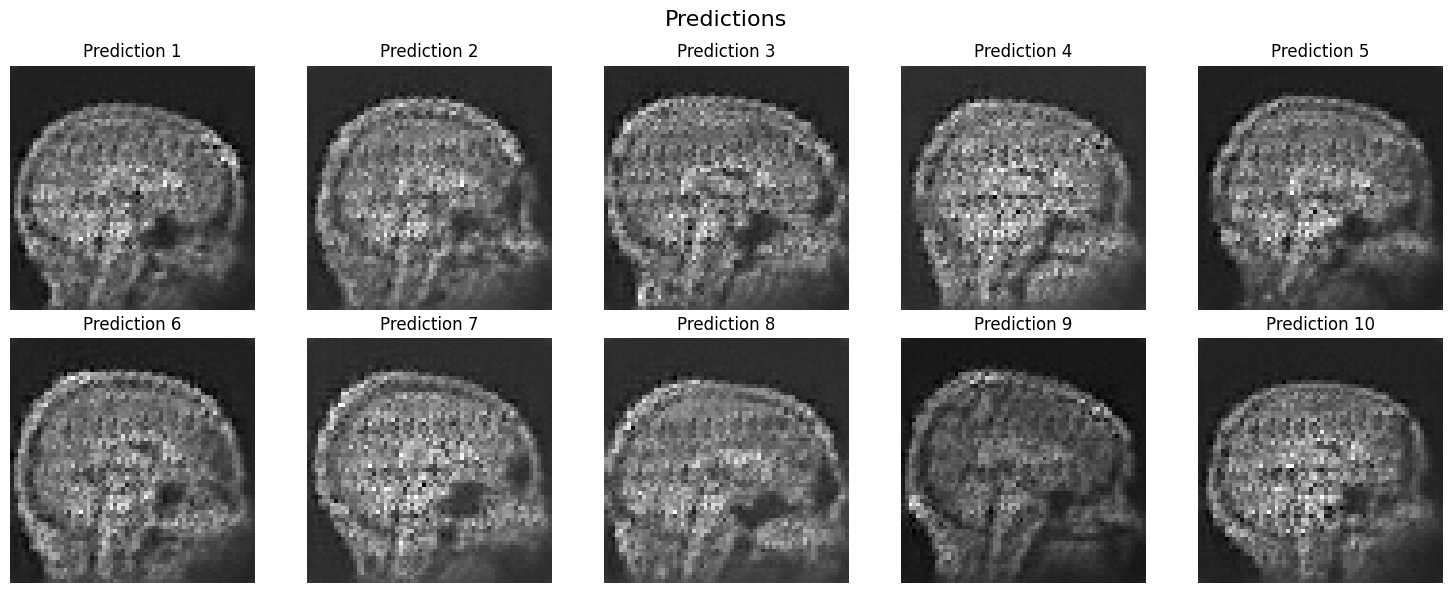

In [61]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("Predictions", fontsize=16)

# Loop through the first 10 predictions
for i in range(10):
    row, col = divmod(i, 5)

    # Squeeze the prediction and convert to numpy
    pred_img = predictions[i].squeeze(0).cpu().numpy()

    axes[row, col].imshow(pred_img, cmap="gray")
    axes[row, col].set_title(f"Prediction {i+1}")
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()


In [62]:
predictions_cpu = predictions.cpu().detach().numpy()
np.save('/content/drive/MyDrive/test_set_nogaps.npy', predictions_cpu)

<br>

---

<br>